In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.4740 - loss: 1.1598 - val_accuracy: 0.4167 - val_loss: 1.2929
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4557 - loss: 1.2011 - val_accuracy: 0.4167 - val_loss: 1.2671
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5052 - loss: 1.1710 - val_accuracy: 0.4167 - val_loss: 1.2434
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5716 - loss: 1.1581 - val_accuracy: 0.4167 - val_loss: 1.2207
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6224 - loss: 1.1088 - val_accuracy: 0.4167 - val_loss: 1.1997
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6315 - loss: 1.1150 - val_accuracy: 0.4167 - val_loss: 1.1784
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6042 - loss: 1.1092 - val_accuracy: 0.4167 - val_loss: 1.1579
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6302 - loss: 1.0871 - val_accuracy: 0.4167 - val_loss: 1.1379

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9000 - loss: 0.5875

 Test Accuracy: 0.90


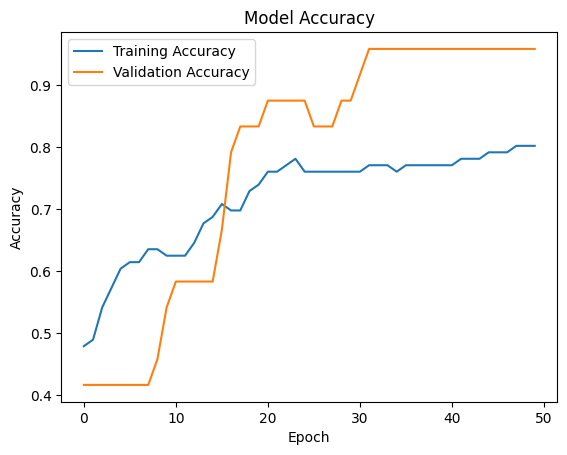

In [10]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



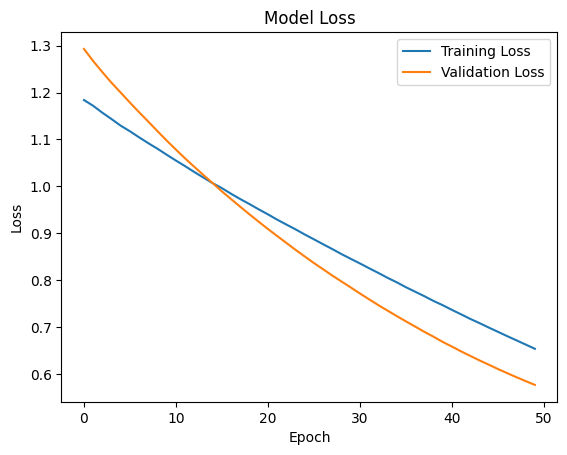

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:

predictions = np.argmax(model.predict(X_test), axis=1)


print("Predicted:", predictions[:10])
print("Actual:   ", y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Predicted: [1 0 2 2 1 0 1 2 1 1]
Actual:    [1 0 2 1 1 0 1 2 1 1]
